# **Final Capstone Project.**

My main research questions focus around looking at the evolution of fighting styles since the first UFC fight until 2021.

When the UFC began, the idea was to have a tournament that would feature martial artists from different disciplines facing each other in a no-holds-barred combat to determine the best martial art.

Immediately, the Gracie family-- who developed Brazilian jiu jitsu-- started to dominate. Before there were weight classes, you could see BJJ practitioners winning fights against martial artists from other disciplines that were much bigger in size.

As time went on, mixed martial arts began to distill into a discipline of its own as martial arts that proved more effective became apparent. There was a time when a black belt in jiu jitsu had an advantage against someone who did not. Now any fighter worth their salt is an elite jiu jitsu practitioner.

I want to look at the evolution of number of fights that end in K.O’s or T.K.O’s (knock out or technical knockout) vs. submission over the years.

Based on the above observations, I postulate that striking has become more important again, and now the fighter with the best kickboxing/muay thai has the upper hand. So, to state my hypotheses:

Wins by submission over time. Hypothesis is that it's gone down over time.
Number of takedowns over time. Hypothesis is that it’s gone down over time.

To start, import libraries:


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import math

# suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")


I am using a dataset found on Kaggle.com. The dataset contains historical fight data from 1993 until March of 2021.

https://www.kaggle.com/rajeevw/ufcdata/data#

I will be using the raw_total_fight_data.csv, which has 41 columns.

# `Click to see column descriptions`








*   R_ and B_ prefix signifies red and blue corner fighter stats respectively
*   opp containing columns is the average of damage done by the opponent on the fighter
*   KD is number of knockdowns
*   SIG_STR is no. of significant strikes 'landed of attempted'
*   SIG_STR_pct is significant strikes percentage
*   TOTAL_STR is total strikes 'landed of attempted'
*   TD is no. of takedowns
*   TD_pct is takedown percentages
*   SUB_ATT is no. of submission attempts
*   PASS is no. times the guard was passed?
*   REV is the no. of Reversals landed
*   HEAD is no. of significant strinks to the head 'landed of attempted'
*   BODY is no. of significant strikes to the body 'landed of attempted'
*   CLINCH is no. of significant strikes in the clinch 'landed of attempted'
*   GROUND is no. of significant strikes on the ground 'landed of attempted'
*   win_by is method of win
*   last_round is last round of the fight (ex. if it was a KO in 1st, then this will be 1)
*   last_round_time is when the fight ended in the last round
*   Format is the format of the fight (3 rounds, 5 rounds etc.)
*   Referee is the name of the Ref
*   date is the date of the fight
*   location is the location in which the event took place
*   Fight_type is which weight class and whether it's a title bout or not
*   Winner is the winner of the fight
*   Stance is the stance of the fighter (orthodox, southpaw, etc.)
*   Height_cms is the height in centimeter
*   Reach_cms is the reach of the fighter (arm span) in centimeter
*   Weight_lbs is the weight of the fighter in pounds (lbs)
*   age is the age of the fighter
*   title_bout Boolean value of whether it is title fight or not
*   weight_class is which weight class the fight is in (Bantamweight, heavyweight, Women's flyweight, etc.)
*   no_of_rounds is the number of rounds the fight was scheduled for
*   current_lose_streak is the count of current concurrent losses of the fighter
*   current_win_streak is the count of current concurrent wins of the fighter
*   draw is the number of draws in the fighter's ufc career
*   wins is the number of wins in the fighter's ufc career
*   losses is the number of losses in the fighter's ufc career
*   total_rounds_fought is the average of total rounds fought by the fighter
*   total_time_fought(seconds) is the count of total time spent fighting in seconds
*   total_title_bouts is the total number of title bouts taken part in by the fighter
*   win_by_Decision_Majority is the number of wins by majority judges decision in the fighter's ufc career
*   win_by_Decision_Split is the number of wins by split judges decision in the fighter's ufc career
*   win_by_Decision_Unanimous is the number of wins by unanimous judges decision in the fighter's ufc career
*   win_by_KO/TKO is the number of wins by knockout in the fighter's ufc career
*   win_by_Submission is the number of wins by submission in the fighter's ufc career
*   win_by_TKO_Doctor_Stoppage is the number of wins by doctor stoppage in the fighter's ufc career


In [ ]:
#@title
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import the data, and delimit the raw csv so I can store it as a usable DataFrame:

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab/raw_total_fight_data.csv', delimiter=';')

In [ ]:
df.head()


,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,R_CTRL,B_CTRL,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41 of 103,23 of 51,39%,45%,41 of 103,23 of 51,0 of 0,0 of 1,---,0%,0,0,0,0,0:03,0:00,32 of 83,14 of 40,8 of 19,5 of 7,1 of 1,4 of 4,41 of 102,23 of 51,0 of 0,0 of 0,0 of 1,0 of 0,KO/TKO,3,0:27,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27 of 57,32 of 67,47%,47%,43 of 73,75 of 110,1 of 2,1 of 3,50%,33%,1,2,0,1,1:15,4:15,22 of 51,10 of 37,4 of 4,7 of 14,1 of 2,15 of 16,15 of 42,28 of 59,4 of 5,3 of 6,8 of 10,1 of 2,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14 of 18,2 of 6,77%,33%,14 of 18,2 of 6,0 of 0,0 of 0,---,---,0,0,0,0,0:10,0:00,10 of 14,1 of 5,0 of 0,0 of 0,4 of 4,1 of 1,9 of 10,2 of 6,0 of 0,0 of 0,5 of 8,0 of 0,KO/TKO,1,0:49,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31 of 65,15 of 41,47%,36%,49 of 87,136 of 168,0 of 0,4 of 5,---,80%,0,2,3,1,1:04,9:53,26 of 60,10 of 35,5 of 5,0 of 1,0 of 0,5 of 5,26 of 56,15 of 41,2 of 2,0 of 0,3 of 7,0 of 0,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30 of 63,51 of 138,47%,36%,59 of 93,92 of 184,2 of 4,1 of 1,50%,100%,0,0,0,1,2:15,3:48,14 of 40,29 of 110,7 of 13,15 of 20,9 of 10,7 of 8,25 of 54,36 of 119,5 of 9,13 of 15,0 of 0,2 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson


# General Cleaning

In [ ]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner'],
      dtype='object')

In [ ]:
columns = ['R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_HEAD', 'B_HEAD', 'R_BODY','B_BODY', 'R_LEG', 'B_LEG', 
        'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH','B_CLINCH', 'R_GROUND', 'B_GROUND']


Splitting the columns with information about what happened in the fight into usable integers:


In [ ]:
attemp = '_att'
landed = '_landed'

for column in columns:
    df[column+attemp] = df[column].apply(lambda X: int(X.split('of')[1]))
    df[column+landed] = df[column].apply(lambda X: int(X.split('of')[0]))
    
df.drop(columns, axis=1, inplace=True)

Convert date to datetime type:


In [ ]:
df['date'] = df['date'].map(pd.to_datetime)

def get_dom(dt):
  return dt.day

def get_m(dt):
  return dt.month

def get_year(dt):
  return dt.year

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year']= df['date'].dt.year

print(df['date'].dtypes)
df.columns

datetime64[ns]


Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR_pct',
       'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_REV', 'B_REV', 'R_CTRL', 'B_CTRL', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner', 'R_SIG_STR._att', 'R_SIG_STR._landed',
       'B_SIG_STR._att', 'B_SIG_STR._landed', 'R_TOTAL_STR._att',
       'R_TOTAL_STR._landed', 'B_TOTAL_STR._att', 'B_TOTAL_STR._landed',
       'R_TD_att', 'R_TD_landed', 'B_TD_att', 'B_TD_landed', 'R_HEAD_att',
       'R_HEAD_landed', 'B_HEAD_att', 'B_HEAD_landed', 'R_BODY_att',
       'R_BODY_landed', 'B_BODY_att', 'B_BODY_landed', 'R_LEG_att',
       'R_LEG_landed', 'B_LEG_att', 'B_LEG_landed', 'R_DISTANCE_att',
       'R_DISTANCE_landed', 'B_DISTANCE_att', 'B_DISTANCE_landed',
       'R_CLINCH_att', 'R_CLINCH_landed', 'B_CLINCH_att', 'B_CLINCH_landed',
       'R_GROUND_att', 'R_GROUND_landed', 'B_GROUND_att', 'B_GROUND_landed',
       'day'

# Weight Class
Creating weight class column:

In [ ]:
def Division(X):
    for Division in weight_classes:
        if Division in X:
            return Division
    if X == 'Catch Weight Bout' or 'Catchweight Bout':
        return 'Catch Weight'
    else:
        return 'Open Weight'
weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']

df['weight_class'] = df['Fight_type'].apply(Division)

# Exploratory data analysis
Checking data types and nulls:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   R_fighter            6012 non-null   object        
 1   B_fighter            6012 non-null   object        
 2   R_KD                 6012 non-null   int64         
 3   B_KD                 6012 non-null   int64         
 4   R_SIG_STR_pct        6012 non-null   object        
 5   B_SIG_STR_pct        6012 non-null   object        
 6   R_TD_pct             6012 non-null   object        
 7   B_TD_pct             6012 non-null   object        
 8   R_SUB_ATT            6012 non-null   int64         
 9   B_SUB_ATT            6012 non-null   int64         
 10  R_REV                6012 non-null   int64         
 11  B_REV                6012 non-null   int64         
 12  R_CTRL               6012 non-null   object        
 13  B_CTRL               6012 non-nul

I'm going to drop the nulls in the Winner column. Other than that, none of the columns I'm interested for the purpose of this analysis have nulls.


In [ ]:
df.dropna(subset=['Winner'], inplace=True)
df.describe()

,R_KD,B_KD,R_SUB_ATT,B_SUB_ATT,R_REV,B_REV,last_round,R_SIG_STR._att,R_SIG_STR._landed,B_SIG_STR._att,B_SIG_STR._landed,R_TOTAL_STR._att,R_TOTAL_STR._landed,B_TOTAL_STR._att,B_TOTAL_STR._landed,R_TD_att,R_TD_landed,B_TD_att,B_TD_landed,R_HEAD_att,R_HEAD_landed,B_HEAD_att,B_HEAD_landed,R_BODY_att,R_BODY_landed,B_BODY_att,B_BODY_landed,R_LEG_att,R_LEG_landed,B_LEG_att,B_LEG_landed,R_DISTANCE_att,R_DISTANCE_landed,B_DISTANCE_att,B_DISTANCE_landed,R_CLINCH_att,R_CLINCH_landed,B_CLINCH_att,B_CLINCH_landed,R_GROUND_att,R_GROUND_landed,B_GROUND_att,B_GROUND_landed,day,month,year
count,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.00000,5902.00000,5902.000000,5902.00000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000,5902.000000
mean,0.251101,0.178753,0.484243,0.343951,0.136903,0.135208,2.313961,80.179431,36.069129,74.177906,30.809895,102.750254,56.085395,91.961877,46.581498,2.952728,1.243477,2.638089,0.886310,62.591833,23.076076,58.164012,19.291935,10.390037,7.210776,9.395120,6.299729,7.197560,5.782277,6.618773,5.218231,62.923246,24.22450,61.36242,22.180447,7.84141,5.429685,7.171637,4.830735,9.414775,6.414944,5.643850,3.798712,15.452728,6.703660,2013.370891
std,0.525227,0.454023,0.927835,0.793741,0.421298,0.413733,1.007784,68.865573,30.914793,65.963315,28.461430,77.675863,44.942255,73.534667,39.688873,3.704832,1.826444,3.649231,1.506958,56.095843,21.513362,54.388479,19.946080,11.492032,8.267205,10.548269,7.497351,9.776815,7.890232,8.705720,6.972638,65.983406,27.37324,62.27163,24.701433,10.95884,7.981341,9.579528,6.925144,14.805481,10.046046,11.233977,7.817860,8.475053,3.449313,5.569105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1994.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,13.000000,22.000000,9.000000,37.000000,20.000000,31.000000,15.000000,0.000000,0.000000,0.000000,0.000000,21.000000,8.000000,16.000000,5.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,5.00000,13.00000,4.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,2010.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,63.000000,29.000000,57.000000,23.000000,91.000000,48.000000,78.000000,38.000000,1.000000,1.000000,1.000000,0.000000,48.000000,17.000000,43.000000,13.000000,7.000000,5.000000,6.000000,4.000000,4.000000,3.000000,3.000000,3.000000,41.000000,15.00000,40.50000,14.000000,4.00000,3.000000,4.000000,2.000000,3.000000,2.000000,1.000000,1.000000,16.000000,7.000000,2014.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,114.000000,51.000000,109.000000,45.000000,150.000000,80.000000,137.000000,68.000000,4.000000,2.000000,4.000000,1.000000,88.000000,32.000000,84.000000,27.000000,15.000000,10.000000,13.000000,9.000000,10.000000,8.000000,9.000000,7.000000,92.000000,35.00000,91.00000,32.000000,11.00000,7.000000,10.000000,7.000000,12.000000,9.000000,6.000000,4.000000,22.000000,10.000000,2018.000000
max,5.000000,4.000000,10.000000,7.000000,5.000000,3.000000,5.000000,744.000000,445.000000,495.000000,206.000000,746.000000,447.000000,497.000000,336.000000,27.000000,21.000000,33.000000,12.000000,553.000000,274.000000,373.000000,179.000000,133.000000,117.000000,

Group by year, and find out how many fights happened each year.

How many years are in the dataset?

In [ ]:
# find the frequency of each value in the column
year_counts = df['year'].value_counts()

year_counts.nunique()

25

How many fights happened in each year?

In [ ]:
year_counts.sort_values()

1998     21
1994     29
1995     32
1996     36
1997     38
2004     39
2003     39
2001     39
2000     42
1999     42
2002     52
2005     79
2021    113
2006    158
2007    169
2008    201
2009    213
2010    250
2011    295
2012    333
2013    376
2020    444
2017    446
2015    464
2018    469
2016    483
2014    494
2019    506
Name: year, dtype: int64

Let's see that visually:

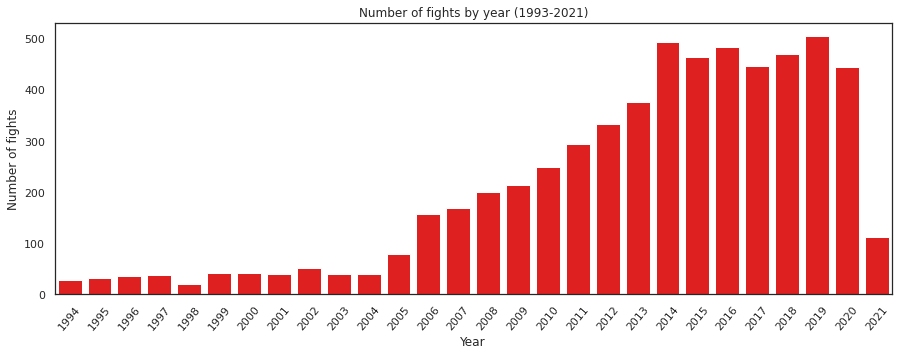

In [ ]:
values = df['year'].value_counts().sort_values(ascending=False)
labels = values.index

clrs=["red"]

sns.set_style("white")
plt.figure(figsize = (15,5))
sns.barplot(y=values, x=labels, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Number of fights')
plt.title('Number of fights by year (1993-2021)');

Since there are many more fights per year in recent years, I revised my hypothesis. There are certainly more submissions by volume in recent years than in the beginning. So, I will test the proportion of fights ending in submissions, and whether that's gone down over time.

But first, I will continue the EDA:

# Analysis of finish type
Order the data to evaluate the change in proportion of submissions vs other finish types over time.

I'll aggregate the proportion of submissions, KO/TKOs, split decisions, and unanimous decisions per year into their own data frames:

In [ ]:
df['is submission?'] = np.where(df['win_by']=='Submission', 1, 0)

df['is KO/TKO?'] = np.where(df['win_by']=='KO/TKO', 1, 0)

df['is decision - split?'] = np.where(df['win_by']=='Decision - Split', 1, 0)

df['is decision - unanimous?'] = np.where(df['win_by']=='Decision - Unanimous', 1, 0)

aggs_df = df.groupby('year')['is submission?'].agg(['sum','count'])
aggs_df['percent'] = aggs_df['sum']/aggs_df['count']

aggko_df = df.groupby('year')['is KO/TKO?'].agg(['sum','count'])
aggko_df['percent'] = aggko_df['sum']/aggko_df['count']

aggds_df = df.groupby('year')['is decision - split?'].agg(['sum','count'])
aggds_df['percent'] = aggds_df['sum']/aggds_df['count']

aggdu_df = df.groupby('year')['is decision - unanimous?'].agg(['sum','count'])
aggdu_df['percent'] = aggdu_df['sum']/aggdu_df['count']

aggs_df['type'] = 'submission'
aggko_df['type'] = 'KO/TKO'
aggds_df['type'] = 'Split Decision'
aggdu_df['type'] = 'Unanimous Decision'

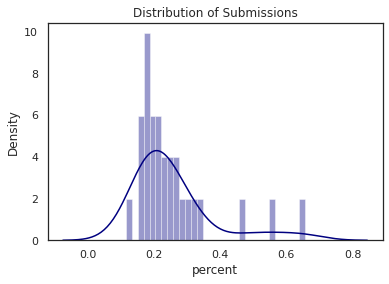

In [ ]:
sns.distplot(aggs_df['percent'], bins=30, color='navy')
plt.title('Distribution of Submissions');

I'd say the distribution of submissions over time is approximately normal.

Wrap them all up in one for plotting:

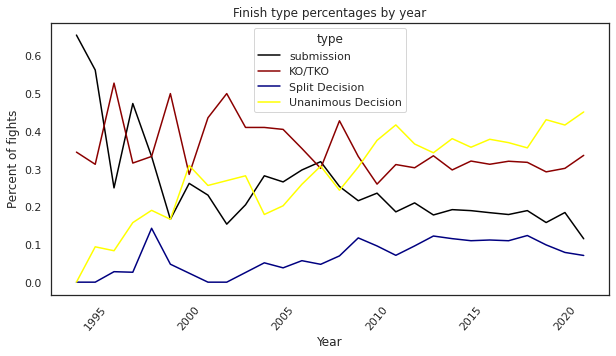

In [ ]:
agg_df = aggs_df.append(other=[aggko_df, aggds_df, aggdu_df])

values=agg_df['percent']
labels=agg_df.index
hue=agg_df['type']

clrs= ["black", "darkred","navy", "yellow"]

plt.figure(figsize= (10,5))
sns.set_style("white")
sns.lineplot(x=labels, y=values, hue=hue, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Percent of fights')
plt.title('Finish type percentages by year');

Drilling into finish types:

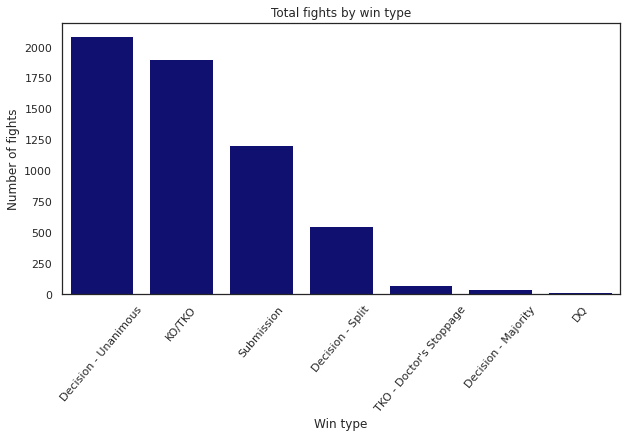

In [ ]:
win_by = df['win_by'].value_counts().sort_values(ascending=False)
win_counts = df['win_by'].value_counts()
sorted_wins = df['win_by'].sort_values(ascending=False)

plt.figure(figsize= (10,5))

clrs = ['navy' for y in values]

sns.barplot(x=win_counts.index, y=win_counts.values, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Win type')
plt.ylabel('Number of fights')
plt.title('Total fights by win type');

Who are the 15 fighters with the most submissions?

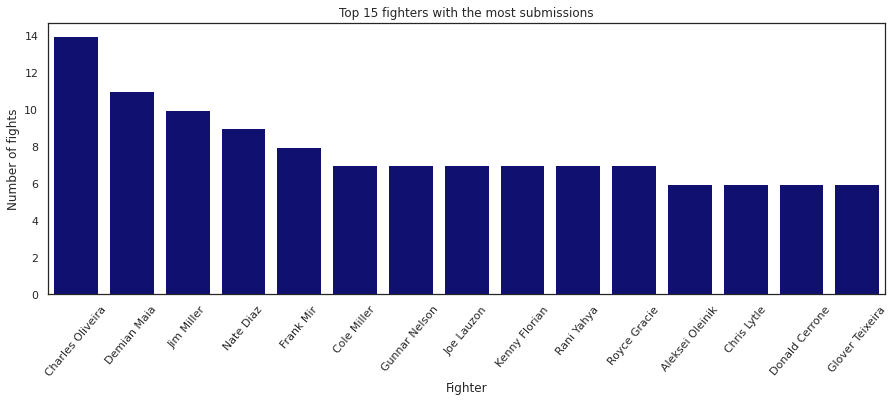

In [ ]:
most_submissions_df = df.groupby('Winner')['is submission?'].agg('sum')
top_15_sub = most_submissions_df.nlargest(15)

index = top_15_sub.index
values = top_15_sub.values

plt.figure(figsize= (15,5))
sns.barplot(x=index, y=values, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Fighter')
plt.ylabel('Number of fights')
plt.title('Top 15 fighters with the most submissions');

# Analysis of fight finish type by weight class

In [ ]:
#fights in weightclass
df['weight_class'].value_counts()

Lightweight              1072
Welterweight             1066
Middleweight              803
Heavyweight               573
Light Heavyweight         559
Featherweight             539
Bantamweight              462
Flyweight                 226
Women's Strawweight       190
Women's Bantamweight      149
Women's Flyweight         110
Open Weight                86
Catch Weight               51
Women's Featherweight      16
Name: weight_class, dtype: int64

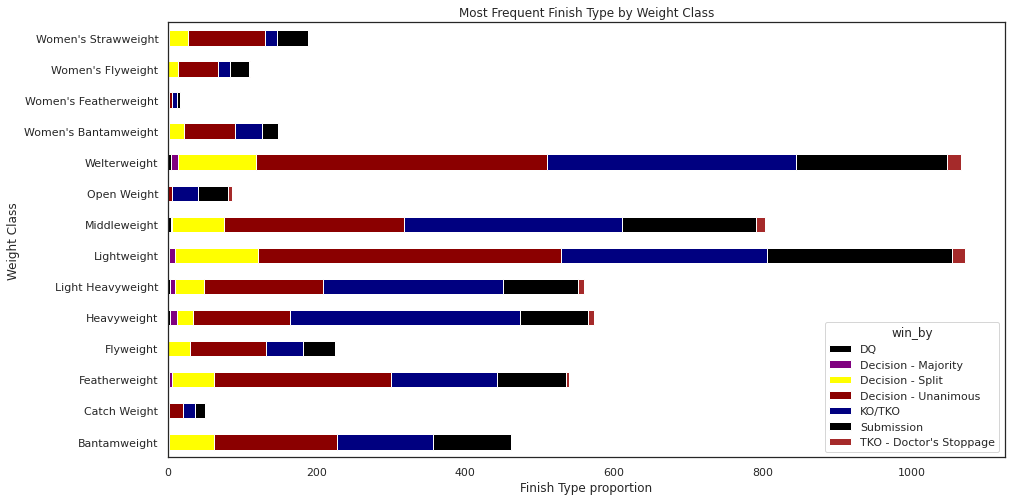

In [ ]:
clss= ["black", "purple", "yellow", "darkred","navy", "black", "brown", "green", "pink"]

bar = df.groupby(['weight_class', 'win_by']).size().reset_index().pivot(columns='win_by', index='weight_class', values=0)
bar.plot(stacked=True, figsize=(15,8), kind="barh", color=clrs)
plt.xlabel('Finish Type proportion')
plt.ylabel('Weight Class')
plt.title('Most Frequent Finish Type by Weight Class');

# Analysis of takedowns
Split the number of takedown columns from the string in R_TD and B_TD columns, convert to integers, and concatentate so I can look at number of total takedowns overtime and check out the distribution.

In [ ]:
df['Total TD'] = df['B_TD_landed']+df['R_TD_landed']

df['Total TD attempted'] = df['R_TD_att']+df['B_TD_att']

aggtd_df = df.groupby('year')['Total TD'].agg(['sum','count'])
aggtd_df['percent'] = df['Total TD']/df['Total TD attempted']

aggtd_df = aggtd_df.dropna()
aggtd_df

,sum,count,percent
year,,,
1995,22,32,0.500000
1996,34,36,0.800000
1997,48,38,0.200000
1998,46,21,0.333333
1999,70,42,0.428571
2000,79,42,0.000000
2002,120,52,0.000000
2003,79,39,0.333333
2004,82,39,0.333333


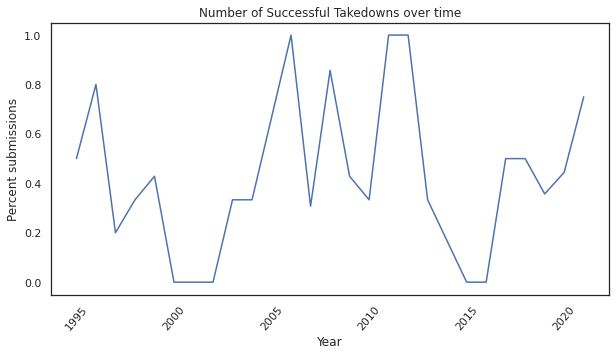

In [ ]:
index=aggtd_df.index
values= aggtd_df['percent'].values

plt.figure(figsize= (10,5))
sns.set_style("white")
sns.lineplot(x=index, y=values, palette=clrs)
plt.xticks(rotation=50)
plt.xlabel('Year')
plt.ylabel('Percent submissions')
plt.title('Number of Successful Takedowns over time');

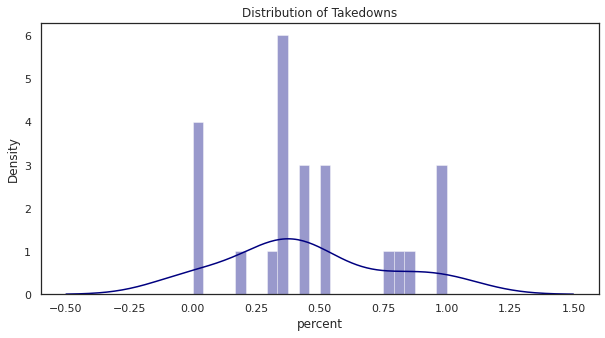

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(aggtd_df['percent'], bins=24, color='navy')
plt.title('Distribution of Takedowns');

# Hypothesis Testing
Now let's prepare our data for some hypothesis testing.

I want to see if the number of fights that end in submissions has gone down over time. Since the overall number of fights per year has increased, I will use a z-test to evaluate if there is a statistically significant difference in proportion of fights ending in submission.

Since the UFC became officially regulated and standardized in 2000, I will test all fights from 2000-2010 against all fights from 2011-2021.

Separating 2000-2010 from 2011-2021 to prepare for hypothesis testing:

In [ ]:
before_2011 = aggs_df[(aggs_df.index >= 2000) & (aggs_df.index <= 2010)]
after_2011 = aggs_df[aggs_df.index >= 2011]

before_2011['type'] = "before 2011"
after_2011['type'] = "after 2011"

Let's run descriptive statistics on our two samples:

In [ ]:
before_2011.sum()

sum                                                      325
count                                                   1281
percent                                              2.72221
type       before 2011before 2011before 2011before 2011be...
dtype: object

In [ ]:
after_2011.sum()

sum                                                      808
count                                                   4423
percent                                              1.96804
type       after 2011after 2011after 2011after 2011after ...
dtype: object

In [ ]:
#before 2011

before_2011.describe()

,sum,count,percent
count,11.000000,11.000000,11.000000
mean,29.545455,116.454545,0.247474
std,21.477261,82.394616,0.046297
min,8.000000,39.000000,0.153846
25%,10.000000,40.500000,0.223366
50%,21.000000,79.000000,0.253731
75%,49.000000,185.000000,0.273937
max,59.000000,250.000000,0.319527


In [ ]:
#after 2011
after_2011.describe()

,sum,count,percent
count,11.000000,11.000000,11.000000
mean,73.454545,402.090909,0.178913
std,23.166198,117.592903,0.024543
min,13.000000,113.000000,0.115044
25%,68.500000,354.500000,0.178782
50%,80.000000,446.000000,0.184685
75%,88.500000,476.000000,0.189710
max,95.000000,506.000000,0.210210


Compare the distributions of the two samples. They appear to be approximately normal, with varying levels of skewness.

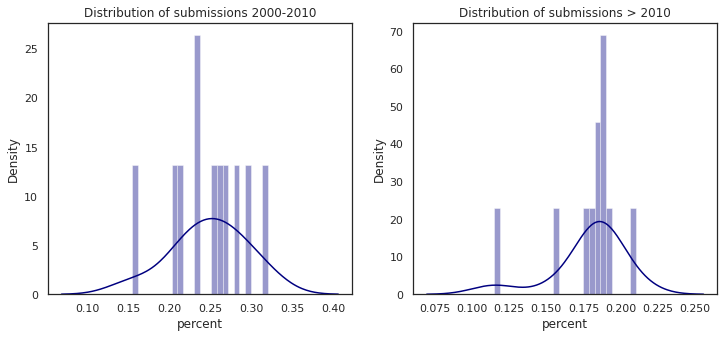

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.distplot(before_2011['percent'], bins=24, ax=ax[0], color='navy')
ax[0].set_title('Distribution of submissions 2000-2010')
sns.distplot(after_2011['percent'], bins=24, ax=ax[1], color='navy')
ax[1].set_title('Distribution of submissions > 2010');

# Submissions hypothesis testing
It's time to perform the z-test.

I want to examine whether there is a significant difference in the proportion of fights ending in submissions from before and after 2011. So, my hypotheses are thus:

Ho: p1 - p2 = 0
Ha: p1 - p2 ≠ 0
To conduct a z-test, I'm importing statsmodel library to use the z-test function: https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

sm.stats.ztest(x1=before_2011['percent'], x2=after_2011['percent'])

(4.339540636466842, 1.427808633945324e-05)

That's a significant P-value at p= 1.4278. Next, calculate the confidence intervals and Cohen's d:

In [ ]:
# Calculate the standard error and compute the confidence intervals
#confidence intervals

sample_1_n = before_2011.shape[0]
sample_2_n = after_2011.shape[0]
sample_1_mean = before_2011['percent'].mean()
sample_2_mean = after_2011['percent'].mean()
sample_1_var = before_2011['percent'].var()
sample_2_var = after_2011['percent'].var()

import math

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

#Cohen's d function

def get_cohens_d(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    s_pooled = math.sqrt((sample_1_var + sample_2_var)/2)
    cohens = (sample_1_mean - sample_2_mean) / s_pooled
    
    return("Cohen's d is: "+str(cohens)+ ".")
  
print(get_cohens_d(before_2011['percent'], after_2011['percent']))

The difference in means at the 95% confidence interval is between -0.09952738602538701 and -0.03759471890978362.
Cohen's d is: 1.8503863446980238.


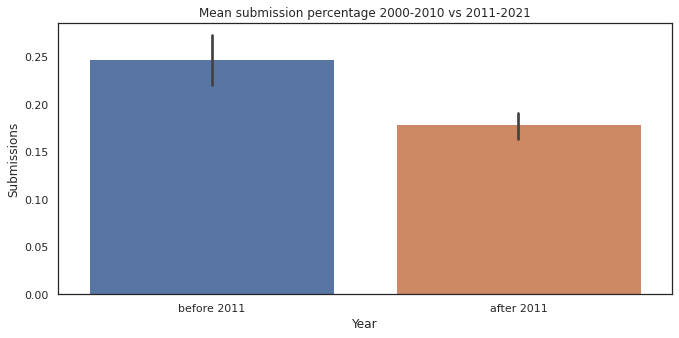

In [ ]:
submissions_test= pd.concat([before_2011, after_2011])

plt.figure(figsize = (11,5))
sns.barplot(x="type", y="percent", data=submissions_test)
plt.xlabel('Year')
plt.ylabel('Submissions')
plt.title('Mean submission percentage 2000-2010 vs 2011-2021');

Based on these results I would reject my null hypothesis and accept that the proportion of fights ending in submissions between 2000-2010 bs. 2011-2021 is statistically significant.

# Takedowns hypothesis testing
Has the number of successful takedowns over the years gone down?

Our hypotheses:

Ho: p1 - p2 = 0
Ha: p1 - p2 ≠ 0

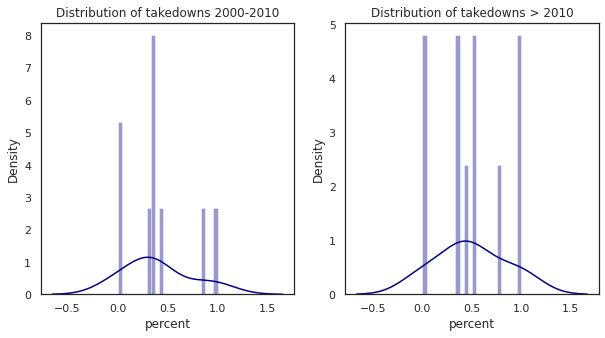

In [ ]:
td_before_2011 = aggtd_df[(aggtd_df.index >= 2000) & (aggtd_df.index <= 2010)]
td_after_2011 = aggtd_df[aggtd_df.index >= 2011]

td_before_2011['type'] = "before 2011"
td_after_2011['type'] = "after 2011"

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(td_before_2011['percent'], bins=24, ax=ax[0], color='navy')
ax[0].set_title('Distribution of takedowns 2000-2010')
sns.distplot(td_after_2011['percent'], bins=24, ax=ax[1], color='navy')
ax[1].set_title('Distribution of takedowns > 2010');

In [ ]:
sm.stats.ztest(x1=td_before_2011['percent'], x2=td_after_2011['percent'])

(-0.5627799128721263, 0.5735847601371591)

In [ ]:
#confidence intervals

sample_1_n = td_before_2011.shape[0]
sample_2_n = td_after_2011.shape[0]
sample_1_mean = td_before_2011['percent'].mean()
sample_2_mean = td_after_2011['percent'].mean()
sample_1_var = td_before_2011['percent'].var()
sample_2_var = td_after_2011['percent'].var()

std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")
print(get_cohens_d(td_before_2011['percent'], td_after_2011['percent']))

The difference in means at the 95% confidence interval is between -0.22081655689627894 and 0.39926588534560753.
Cohen's d is: -0.2588882663555709.


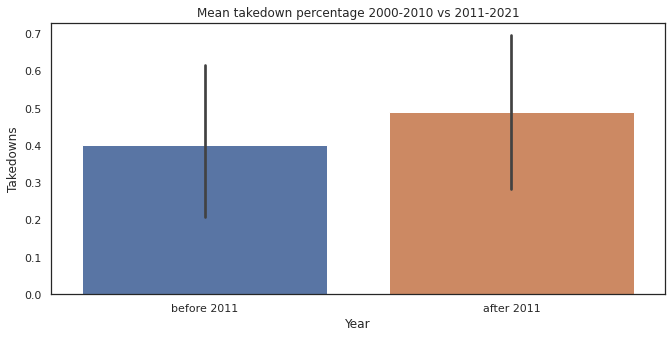

In [ ]:
takedowns_test= pd.concat([td_before_2011, td_after_2011])

plt.figure(figsize = (11,5))
sns.barplot(x="type", y="percent", data=takedowns_test)
plt.xlabel('Year')
plt.ylabel('Takedowns')
plt.title('Mean takedown percentage 2000-2010 vs 2011-2021');


Doesn't look like the number of successful takedowns over time has changed very significantly. We've failed to reject the null.

# Conclusion
Found that my original hypothesis that the proportion of fights ending in takedowns has gone down was supported by a z-test. I was able to reject the null.
Failed to reject the null hypothesis that there was a change in proportion of successful takedowns over time.
I'm not surprised by my findings on submissions. My guess as to why this is the case is that as time has gone on, more fighters are proficient at brazilian jiu jitsu, so the skills gaps between those who come from a BJJ background and those who don't has narrowed significantly. Also, as it develops as a sport, mixed martial arts will continue to evolve and refine as fighters introduce new techniques.

Brazilian Jiu Jitsu has become ingrained into the sport-- where other types of martial arts sank when put to the test, brazilian jiu jitsu rose to the top. But now and going forward, in order for a fighter to stay on top they'll need to have elite level ground AND striking abilities.

I think anyone who's interested in mixed martials arts would find valuable insights here. The intended audience can glean insights that help them think about where the future of the sport is going. It could be used by aspiring and current fighters to understand what fighting styles are important.

As I continue to improve my data science and analytics abilities, I'm excited to continue researching this topic to uncover more insights about UFC and mixed martial arts.